# HW2 - HR Analysis
#### by 108971005 黃俊鈞

本資料集是基於 HR 的員工特徵欄位，目的在於預測員工的離職情況。本流程依以下模式進行：

![Data Pipeline](./HW2_data_pipeline.png)

## 前置作業

在一開始需讀取本次作業的函式庫，在 NB 上所寫的是以主要流程為主，因此把重構出來的各項流程都獨立在另一個程式碼檔案裡：

In [1]:
source('HW2_108971005.R')
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

df.train <- read.csv('./hw2/training.csv', sep = ',')
df.test <- read.csv('./hw2/testing.csv', sep = ',')

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




## 資料探索

資料探索的過程，我主要是在觀察資料的一些數據分佈情況，以決定如何進行特徵工程：

### 列出資料

In [2]:
head(df.train, n=3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0


In [3]:
head(df.test, n=3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,12,4,Male,2,3,Manufacturing Director,3,Single,9526,0,4,2,0,10,2,3,9,7,1,8
2,35,No,Travel_Rarely,Research & Development,16,3,Medical,14,1,Male,4,1,Laboratory Technician,2,Married,2426,0,3,3,1,6,5,3,5,4,0,3
3,29,No,Travel_Rarely,Research & Development,21,4,Life Sciences,20,2,Female,4,3,Manufacturing Director,1,Divorced,9980,1,3,3,1,10,1,3,10,9,8,8


### 觀察統計數據

In [4]:
summary(df.train)

      Age        Attrition           BusinessTravel
 Min.   :18.00   No :987   Non-Travel       :116   
 1st Qu.:30.00   Yes:190   Travel_Frequently:220   
 Median :36.00             Travel_Rarely    :841   
 Mean   :36.82                                     
 3rd Qu.:42.00                                     
 Max.   :60.00                                     
                                                   
                  Department  DistanceFromHome   Education    
 Human Resources       : 54   Min.   : 1.000   Min.   :1.000  
 Research & Development:759   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :364   Median : 7.000   Median :3.000  
                              Mean   : 9.034   Mean   :2.926  
                              3rd Qu.:13.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  
                                                              
          EducationField EmployeeNumber EnvironmentSatisfaction    Gender   
 Hu

### 視覺化分析

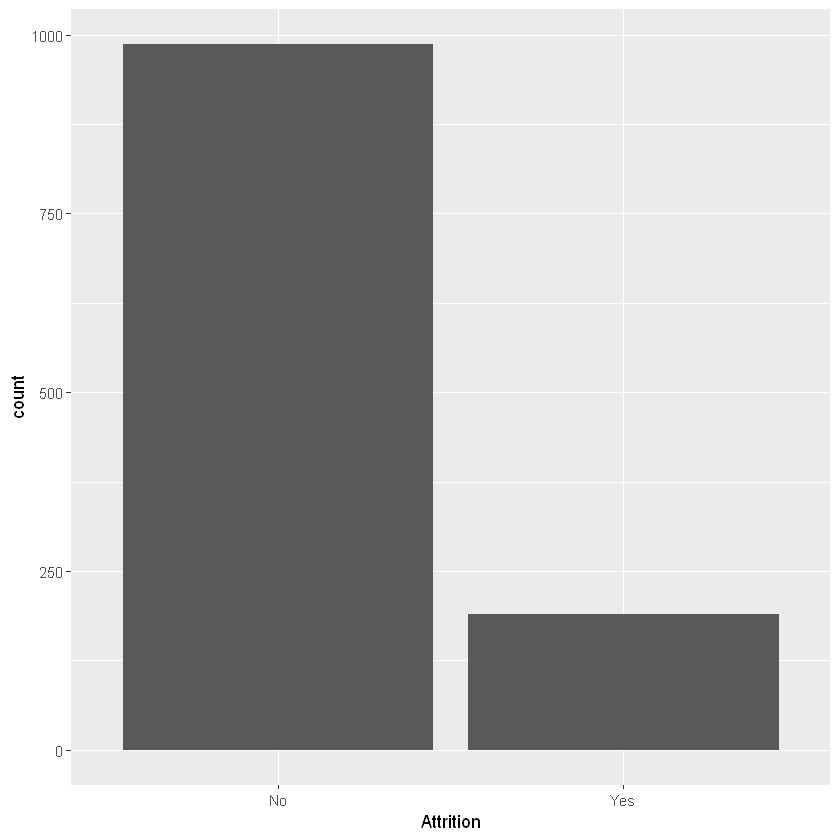

In [5]:
ggplot(df.train, aes(x = Attrition)) + geom_bar()

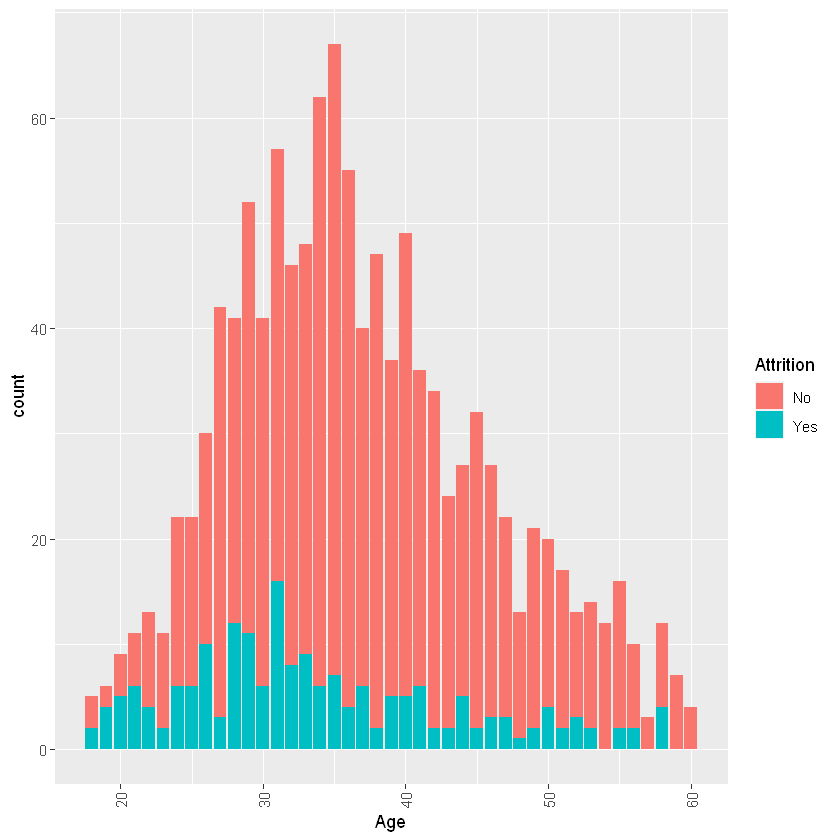

In [6]:
ggplot(df.train, aes(x = Age, fill = Attrition)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

### 觀察結果

1. 會離職的人數與不會離職的人數相比，差距很大，這會導致不平衡的預測結果